In [1]:
import re
delimiter = "，|。|、|？"  
text = '3年前就讀高雄應用大學二年級的陳顯佳，為閃避跨越雙黃線來車，撞上路邊、摔斷頸椎，頸部以下全癱，嘴被插管，父母每天去看他，他都意識清醒、眨眼流淚，17天後他因頸椎受損抑制呼吸，醫師用盡強力針與電擊都無效，'
for i in re.split(delimiter, text):
    print i

3年前就讀高雄應用大學二年級的陳顯佳
為閃避跨越雙黃線來車
撞上路邊
摔斷頸椎
頸部以下全癱
嘴被插管
父母每天去看他
他都意識清醒
眨眼流淚
17天後他因頸椎受損抑制呼吸
醫師用盡強力針與電擊都無效



In [2]:
w = '          周年慶    3歲         \n    大拍賣'
print w

          周年慶    3歲         
    大拍賣


In [3]:
print w.split()
for i in w.split():
    print i

['\xe5\x91\xa8\xe5\xb9\xb4\xe6\x85\xb6', '3\xe6\xad\xb2', '\xe5\xa4\xa7\xe6\x8b\x8d\xe8\xb3\xa3']
周年慶
3歲
大拍賣


In [4]:
print '|'.join(w.split())

周年慶|3歲|大拍賣


In [5]:
a = '民進黨後天將公布'
print a.split('後天')
for i in a.split('後天'):
    print i


['\xe6\xb0\x91\xe9\x80\xb2\xe9\xbb\xa8', '\xe5\xb0\x87\xe5\x85\xac\xe5\xb8\x83']
民進黨
將公布


In [6]:
print ''.join(a.split('後天'))

民進黨將公布


In [7]:
def removeKey(text, keyword):
    textAry= text
    for key in keyword:
        textAry = ''.join(textAry.split(key))
    return textAry


In [8]:
a = '民進黨後天將公布'
print removeKey(a, ['後天'])


a = '民進黨後天將公布'
print removeKey(a, ['民進黨', '後天'])


民進黨將公布
將公布


In [9]:
def splitSentense(text, delimiter):
    return re.split(delimiter, text)

In [10]:
delimiter = "，|。|、|（|）|／|《|》|】|【|「|」|；|：|！".decode('utf-8')  

In [11]:
import sqlite3
db = sqlite3.connect('news2.sqlite') 
cur = db.cursor()
cur.execute('select title, summary from news_entry')
allNews = cur.fetchall()
sentenceAry = []
for rec in allNews:
    text = rec[1]
    sentenceAry += splitSentense(text,delimiter)
cur.close()
db.close()

In [12]:
print len(sentenceAry)

40510


In [54]:
def ngram(input_sentence, n = 2):
    word_dic = {}
    sentence  = input_sentence
    for i in range(0, len(sentence) - n + 1):        
        if sentence[i:i+n] not in word_dic:
            word_dic[sentence[i:i+n]] = 1
        else:
            word_dic[sentence[i:i+n]] = word_dic[sentence[i:i+n]] + 1
    return word_dic

In [55]:
keywords=[]        
ret_terms={}
words_freq    = []
for term_length in range(4,1,-1):
    word_dic = {}
    for sentence in sentenceAry:
        text_list = removeKey(sentence,keywords)        
        ngram_words = ngram(text_list,term_length) 
        for word in ngram_words:
            if word not in word_dic:
                word_dic[word] = 1
            else:
                word_dic[word] += ngram_words[word]   
    for word in word_dic:
        if word_dic[word] >= 5:
            keywords.append(word)            
            ret_terms.update({word:word_dic[word]})

In [56]:
import operator
sorted_terms = sorted(ret_terms.iteritems(),key=operator.itemgetter(1),reverse=True) 

In [57]:
for term in sorted_terms[0:30]:
    print term[0], term[1]

表示 96
台北報導 62
台灣 58
自己 56
沒有 55
提供 53
10 51
中國 50
報導 50
美國 48
目前 48
11 48
問題 47
朱立倫 47
可以 45
認為 44
英國 44
更新 44
蘋果 44
對於 44
發現 44
希望 43
今天 43
網友 43
指出 43
中心 42
可能 42
就是 41
民眾 40
不過 40


In [58]:
import jieba


seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認", cut_all=True)
print "Full Mode:", "/ ".join(seg_list) 

Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
DEBUG:jieba:Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
Loading model from cache c:\users\user\appdata\local\temp\jieba.cache
DEBUG:jieba:Loading model from cache c:\users\user\appdata\local\temp\jieba.cache
Loading model cost 0.578 seconds.
DEBUG:jieba:Loading model cost 0.578 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


Full Mode: 大/ 巨蛋/ 案/ 對/ 市府/ 同仁/ 下/ 封口/ 封口令/ 口令/ / / / 柯/ P/ 否/ 認


In [59]:
seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認", cut_all=True)
print "Full Mode:", "/ ".join(seg_list) 

seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認", cut_all=False)
print "Default Mode:", "/ ".join(seg_list) 


Full Mode: 大/ 巨蛋/ 案/ 對/ 市府/ 同仁/ 下/ 封口/ 封口令/ 口令/ / / / 柯/ P/ 否/ 認
Default Mode: 大/ 巨蛋/ 案對/ 市府/ 同仁/ 下/ 封口令/ ？/ 　/ 柯/ P/ 否認


In [60]:
import jieba.posseg as pseg
words = pseg.cut("大巨蛋案對市府同仁下封口令？　柯P否認")
for w in words:
    print w.word, w.flag

大 a
巨蛋 n
案 ng
對 p
市府 n
同仁 nr
下 f
封口令 n
？ x
　x
柯 nr
P eng
否認 v


In [61]:
sentence = "大巨蛋案對市府同仁下封口令？　柯P否認"
words = jieba.cut(sentence, cut_all=False)
print "/ ".join(words) 


大/ 巨蛋/ 案對/ 市府/ 同仁/ 下/ 封口令/ ？/ 　/ 柯/ P/ 否認


In [62]:
jieba.add_word('柯P',100, 'nr')
jieba.add_word('大巨蛋',100, 'ns')


In [63]:
sentence = "大巨蛋案對市府同仁下封口令？　柯P否認"
words = jieba.cut(sentence, cut_all=False)
print "/ ".join(words) 


大巨蛋/ 案對/ 市府/ 同仁/ 下/ 封口令/ ？/ 　/ 柯P/ 否認


In [64]:
words = jieba.tokenize(unicode(sentence, 'utf-8'))

for tw in words:
    print tw[0], tw[1], tw[2]


大巨蛋 0 3
案對 3 5
市府 5 7
同仁 7 9
下 9 10
封口令 10 13
？ 13 14
　14 15
柯P 15 17
否認 17 19


In [65]:
import jieba.analyse
tags = jieba.analyse.extract_tags(sentence, 1)
print ",".join(tags)
tags = jieba.analyse.extract_tags(sentence, 1, allowPOS = ['nr'])
print ",".join(tags)


封口令
柯P


In [67]:
print sentenceAry[0]
words = jieba.cut(sentenceAry[0])
for ele in words:
    print ele

求婚失敗超尷尬
求婚
失敗
超
尷尬


In [13]:
import jieba
ret_terms = {}
for sentence in sentenceAry:
    words = jieba.cut(sentence)
    for ele in words:
        if ele not in ret_terms:
            ret_terms[ele] = 1
        else:
            ret_terms[ele] = ret_terms[ele] + 1


Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
DEBUG:jieba:Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
Loading model from cache c:\users\user\appdata\local\temp\jieba.cache
DEBUG:jieba:Loading model from cache c:\users\user\appdata\local\temp\jieba.cache
Loading model cost 0.572 seconds.
DEBUG:jieba:Loading model cost 0.572 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


In [14]:
import operator
sorted_terms = sorted(ret_terms.iteritems(),key=operator.itemgetter(1),reverse=True) 

In [15]:
for term in sorted_terms[0:200]:
    if len(term[0]) >=2:
        print term[0], term[1]

報導 899
表示 596
台灣 370
蘋果 355
台北 355
自己 355
中心 351
10 334
綜合 323
時間 319
可以 259
提供 256
更新 246
網友 237
今年 234
影片 227
新聞 223
因為 218
可能 213
就是 209
認為 209
指出 208
他們 206
今天 206
我們 205
警方 204
問題 200
發現 198
目前 198
公司 185
美國 184
不過 179
the 179
一個 179
中國 171
希望 164
日本 163
總統 159
11 158
不是 156
男子 154
工作 153
沒有 151
國民黨 149
美元 148
12 148
包括 147
要求 141
萬元 140
調查 140
未來 139
20 138
一名 138
政府 137
還是 136
因此 133
是否 132
朱立倫 131
進行 131
市場 130
已經 129
開始 129
其他 128
台北市 124
立委 122
照片 121
其中 120
女子 119
造成 117
所以 117
民眾 116
發生 115
經濟 115
英文 114
去年 114
什麼 114
增加 113
活動 113
英國 112
外電 112
使用 111
如果 111
相關 111


In [32]:
import jieba.analyse
ret_terms = {}
for sentence in sentenceAry:
    words = jieba.analyse.extract_tags(sentence)
    for ele in words:
        if ele not in ret_terms:
            ret_terms[ele] = 1
        else:
            ret_terms[ele] = ret_terms[ele] + 1


In [33]:
import operator
sorted_terms = sorted(ret_terms.iteritems(),key=operator.itemgetter(1),reverse=True) 

In [34]:
swd = []
for term in sorted_terms[0:100]:
    if len(term[0]) >=2:
        swd.append((term[0],  term[1]))



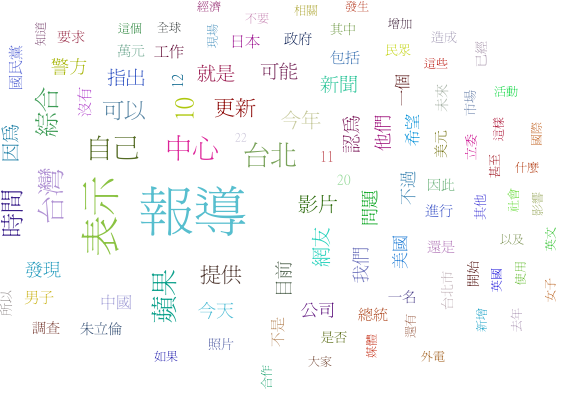

In [35]:
from pytagcloud import create_tag_image, make_tags
from IPython.display import Image
tags = make_tags(swd, maxsize=50)
create_tag_image(tags, 'wc.png', size=(600,400), fontname='SimHei')
Image(filename='wc.png') 

In [38]:
import requests
import json
res = requests.get('https://graph.facebook.com/v2.5/llchu/posts?access_token=CAACEdEose0cBAJEGzxIxq9aQffPcTtwH2ZC8YKLPJKwKzU2yxGmlZCBbIUwIOy72dplK0h2BHzN8FXiPacH3A2uG0HXWlkW4VbHptFHvJxoaSNFwGLZAvI4H7IL9HDqrZCtWIaZALA8SZALGcWCFyLTfrvbrFtejlTL0a0uvKSQVWnxS5PcvnAfUGIOuwpCZAVvmBex7XHc2AwXpfTw6gEj&debug=all&format=json&limit=100&method=get&pretty=0&suppress_http_code=1')
jd = json.loads(res.text)
messageary = []
for m in jd['data']:
    messageary.append(m['message'])

In [40]:
import jieba
ret_terms = {}
for message in messageary:
    words = jieba.cut(message)
    for w in words:
        if w not in ret_terms:
            ret_terms[w] = 1
        else:
            ret_terms[w] = ret_terms[w] + 1

In [41]:
import operator
sorted_terms = sorted(ret_terms.iteritems(),key=operator.itemgetter(1),reverse=True) 

swd = []
for term in sorted_terms[0:100]:
    if len(term[0]) >=2:
        swd.append((term[0],  term[1]))

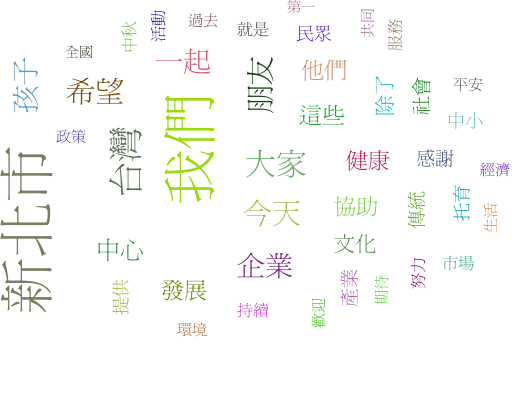

In [42]:
from pytagcloud import create_tag_image, make_tags
from IPython.display import Image
tags = make_tags(swd, maxsize=50)
create_tag_image(tags, 'wc.png', size=(600,400), fontname='SimHei')
Image(filename='wc.png') 

In [45]:
import jieba
import jieba.posseg as pseg
ret_terms = {}
for message in messageary:
    words = pseg.cut(message)
    for w in words:
        if w.flag in ['nr', 'n', 'ng', 'nr','nrfg','nrt','ns','nt','nz']:
            if w.word not in ret_terms:
                ret_terms[w.word] = 1
            else:
                ret_terms[w.word] = ret_terms[w.word] + 1

In [46]:
import operator
sorted_terms = sorted(ret_terms.iteritems(),key=operator.itemgetter(1),reverse=True) 

swd = []
for term in sorted_terms[0:100]:
    if len(term[0]) >=2:
        swd.append((term[0],  term[1]))

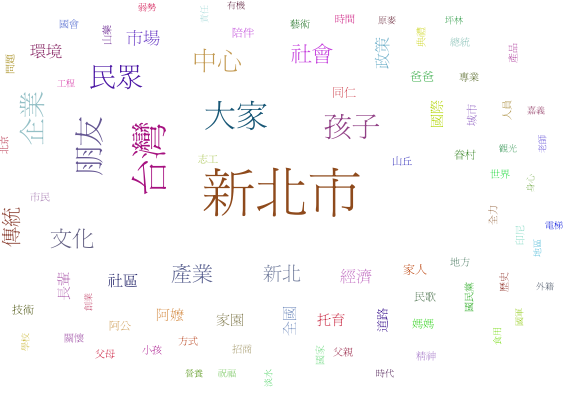

In [47]:
from pytagcloud import create_tag_image, make_tags
from IPython.display import Image
tags = make_tags(swd, maxsize=50)
create_tag_image(tags, 'wc.png', size=(600,400), fontname='SimHei')
Image(filename='wc.png') 

In [50]:
import requests
import json
res = requests.get('https://graph.facebook.com/v2.5/tsaiingwen/posts?access_token=CAACEdEose0cBAJEGzxIxq9aQffPcTtwH2ZC8YKLPJKwKzU2yxGmlZCBbIUwIOy72dplK0h2BHzN8FXiPacH3A2uG0HXWlkW4VbHptFHvJxoaSNFwGLZAvI4H7IL9HDqrZCtWIaZALA8SZALGcWCFyLTfrvbrFtejlTL0a0uvKSQVWnxS5PcvnAfUGIOuwpCZAVvmBex7XHc2AwXpfTw6gEj&debug=all&format=json&limit=100&method=get&pretty=0&suppress_http_code=1')
jd = json.loads(res.text)
messageary = []
for m in jd['data']:
    if 'message' in m:
        messageary.append(m['message'])

In [ ]:
import jieba
import jieba.posseg as pseg
ret_terms = {}
for message in messageary:
    words = pseg.cut(message)
    for w in words:
        if w.flag in ['nr', 'n', 'ng', 'nr','nrfg','nrt','ns','nt','nz']:
            if w.word not in ret_terms:
                ret_terms[w.word] = 1
            else:
                ret_terms[w.word] = ret_terms[w.word] + 1

In [ ]:
import operator
sorted_terms = sorted(ret_terms.iteritems(),key=operator.itemgetter(1),reverse=True) 

swd = []
for term in sorted_terms[0:100]:
    if len(term[0]) >=2:
        swd.append((term[0],  term[1]))